In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Coffe_sales.csv")

In [3]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [5]:
# convert to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_29187/3093750455.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"] = pd.to_datetime(df["Time"], errors="coerce")


In [6]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,2025-10-16 10:15:50.520
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-16 12:19:22.539
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-16 12:20:18.089
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-16 13:46:33.006
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-16 13:48:14.626
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,2025-10-16 10:34:54.894
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-16 14:43:37.362
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-16 14:44:16.864
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,2025-10-16 15:47:28.723


In [7]:
df[df.duplicated()]

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time


In [8]:
df.isnull().any()

hour_of_day    False
cash_type      False
money          False
coffee_name    False
Time_of_Day    False
Weekday        False
Month_name     False
Weekdaysort    False
Monthsort      False
Date           False
Time           False
dtype: bool

In [9]:
df["money"] = pd.to_numeric(df["money"], errors="coerce")

In [10]:
weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
month_order = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

df["Weekday"] = pd.Categorical(df["Weekday"], categories=weekday_order, ordered=True)
df["Month_name"] = pd.Categorical(
    df["Month_name"], categories=month_order, ordered=True
)

In [11]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,2025-10-16 10:15:50.520
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-16 12:19:22.539
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-16 12:20:18.089
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-16 13:46:33.006
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,2025-10-16 13:48:14.626


# Question 1 
What times of day and days of the week generate the highest sales volume, and how can staffing or store hours be optimized to match customer demand? 

Purpose: Helps identify peak operational periods to guide shift scheduling and labor cost efficiency.

In [ ]:
# general aggregations

sales_by_hour = (
    df.groupby("hour_of_day", as_index=False)["money"].sum().sort_values("hour_of_day")
)
count_by_hour = (
    df.groupby("hour_of_day", as_index=False)
    .size()
    .rename(columns={"size": "transactions"})
)
sales_by_timeofday = (
    df.groupby("Time_of_Day", as_index=False)["money"]
    .sum()
    .sort_values("money", ascending=False)
)
sales_by_weekday = (
    df.groupby(["Weekday", "Weekdaysort"], as_index=False)["money"]
    .sum()
    .sort_values("Weekdaysort")
)
sales_by_coffee = (
    df.groupby("coffee_name", as_index=False)["money"]
    .sum()
    .sort_values("money", ascending=False)
)

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_29187/1965935093.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_weekday = df.groupby(['Weekday','Weekdaysort'], as_index=False)['money'].sum().sort_values('Weekdaysort')


In [ ]:
pivot_df = df.pivot_table(
    index="hour_of_day", columns="Weekday", values="money", aggfunc="sum", fill_value=0
)

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_29187/1780044718.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index='hour_of_day', columns='Weekday', values='money', aggfunc='sum', fill_value=0)


In [14]:
pivot_df

Weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
hour_of_day,,,,,,,
6,61.72,0.00,0.00,0.00,87.68,0.00,0.00
7,694.12,486.42,551.08,416.86,575.08,66.62,55.84
8,1241.24,1465.10,897.88,670.10,1480.78,683.80,578.98
9,1184.44,1184.92,763.66,1026.70,1493.50,993.38,617.68
10,1650.78,1479.32,1479.82,1486.66,1333.84,1224.58,1543.52
11,1155.04,1728.16,1378.88,819.00,868.48,1602.24,901.30
12,734.76,918.94,966.92,866.02,1193.76,1455.82,1283.40
13,856.24,675.00,1328.44,992.92,1116.36,1055.14,1004.66
14,1389.22,1007.62,489.36,994.86,1055.62,1220.22,1016.90


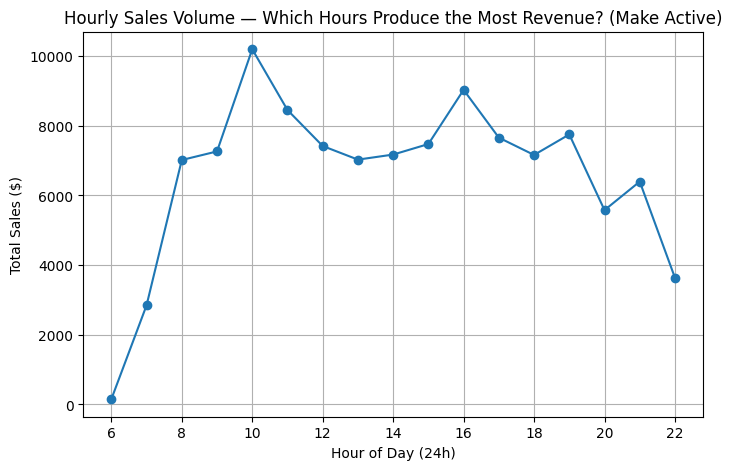

In [ ]:
"""
TODO:
1. Make this an active title
2. get the $ value on top of the o marker
3. move the y axis label to the top and have padding between the title and the label
4. remove the top and right box line for more space
"""

hourly_sales = df.groupby("hour_of_day")["money"].sum()

plt.figure(figsize=(8, 5))
plt.plot(hourly_sales.index, hourly_sales.values, marker="o")
plt.title("Hourly Sales Volume — Which Hours Produce the Most Revenue? (Make Active)")
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()

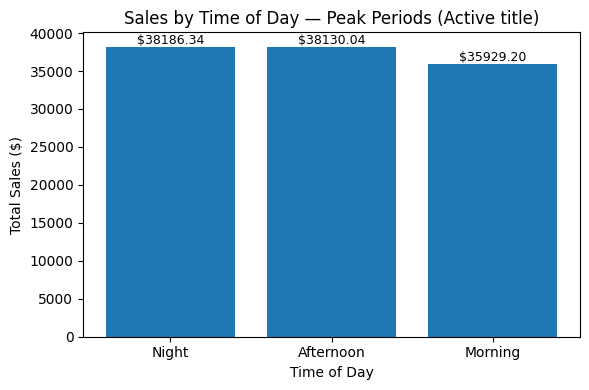

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_29187/146999868.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_sales = df.pivot_table(


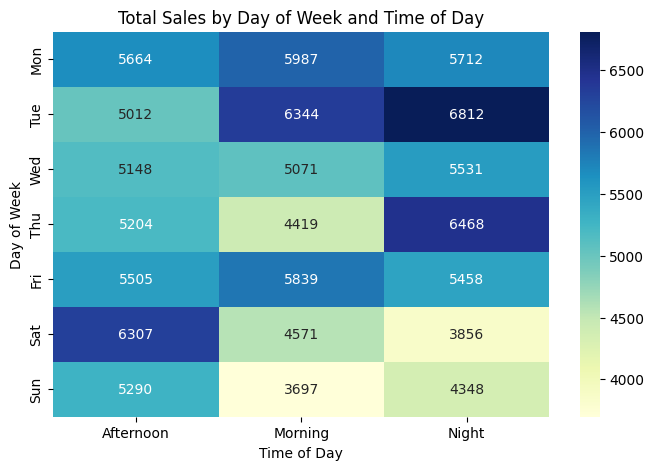

In [ ]:
"""
1. First graph gives us the total sales
2. Secodn graph gives us the sales broken down by day for the 3 slots
TODO:
1. Make this an active title
2. on the x axis define what meaning morning after noon eveing
3. move the y axis label to the top and have padding between the title and the label
4. remove the top and right box line for more space
5. Maybe we can facet these two graphs
"""

plt.figure(figsize=(6, 4))
plt.bar(sales_by_timeofday["Time_of_Day"], sales_by_timeofday["money"])
plt.xlabel("Time of Day")
plt.ylabel("Total Sales ($)")
plt.title("Sales by Time of Day — Peak Periods (Active title)")
for idx, val in enumerate(sales_by_timeofday["money"]):
    plt.text(idx, val + 0.5, f"${val:.2f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

pivot_sales = df.pivot_table(
    index="Weekday", columns="Time_of_Day", values="money", aggfunc="sum"
)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Total Sales by Day of Week and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Day of Week")
plt.show()

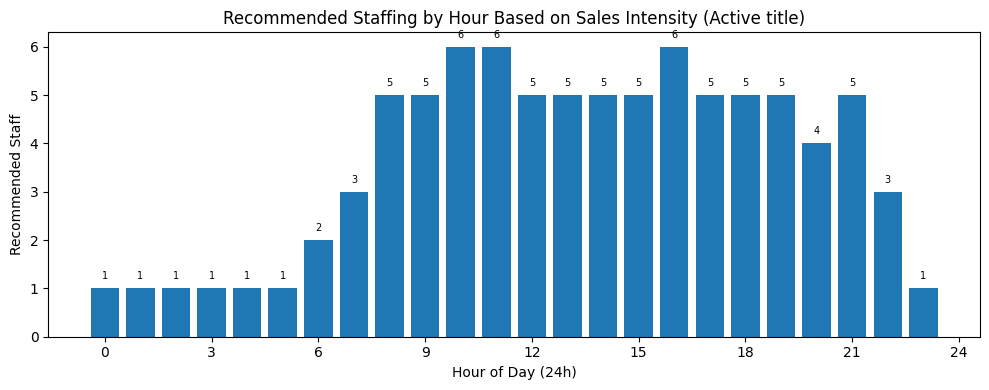

In [ ]:
import math
from matplotlib.ticker import MaxNLocator

"""
TODO:
1. Make this an active title 
2. move the y axis label to the top and have padding between the title and the label 
3. remove the top and right box line for more space  
"""

hour_sales = sales_by_hour.set_index("hour_of_day")["money"]
if hour_sales.max() > 0:
    normalized = hour_sales / hour_sales.max()
else:
    normalized = hour_sales * 0
recommended_staff = (normalized * 5).apply(math.ceil) + 1  # scale to 1..6 staff
recommended_df = (
    recommended_staff.reset_index()
    .rename(columns={"money": "recommended_staff"})
    .rename(columns={0: "recommended_staff"})
)

rec_hours = (
    pd.DataFrame({"hour_of_day": range(0, 24)})
    .merge(recommended_df, on="hour_of_day", how="left")
    .fillna(1)
)
rec_hours["recommended_staff"] = rec_hours["recommended_staff"].astype(int)

plt.figure(figsize=(10, 4))
plt.bar(rec_hours["hour_of_day"], rec_hours["recommended_staff"])
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Recommended Staff")
plt.title("Recommended Staffing by Hour Based on Sales Intensity (Active title)")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
for idx, val in enumerate(rec_hours["recommended_staff"]):
    plt.text(
        rec_hours["hour_of_day"].iloc[idx],
        val + 0.15,
        str(val),
        ha="center",
        va="bottom",
        fontsize=7,
    )
plt.tight_layout()
plt.show()

In [ ]:
rec_open_hours = rec_hours[rec_hours["recommended_staff"] > 1][
    ["hour_of_day", "recommended_staff"]
]
print("Recommended Staff by Hour (hours with >1 staff)", rec_open_hours)

Recommended Staff by Hour (hours with >1 staff)     hour_of_day  recommended_staff
6             6                  2
7             7                  3
8             8                  5
9             9                  5
10           10                  6
11           11                  6
12           12                  5
13           13                  5
14           14                  5
15           15                  5
16           16                  6
17           17                  5
18           18                  5
19           19                  5
20           20                  4
21           21                  5
22           22                  3


# Question 2
Which types of coffee are most popular during different times of the day, and how should inventory and promotions adjust accordingly?
Purpose: Helps managers plan inventory and marketing by matching coffee types to customer habits (e.g., cappuccinos in the morning, iced drinks in the afternoon).

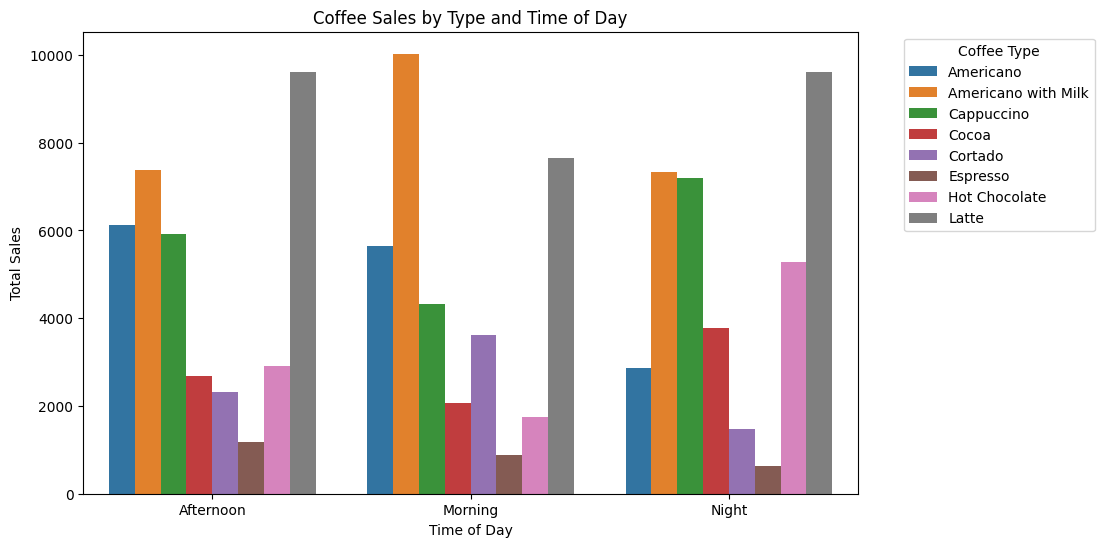

In [ ]:
"""
Do we need this? Look at the plots below
"""

coffee_time_sales = (
    df.groupby(["Time_of_Day", "coffee_name"])["money"].sum().reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=coffee_time_sales, x="Time_of_Day", y="money", hue="coffee_name")
plt.title("Coffee Sales by Type and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Sales")
plt.legend(title="Coffee Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

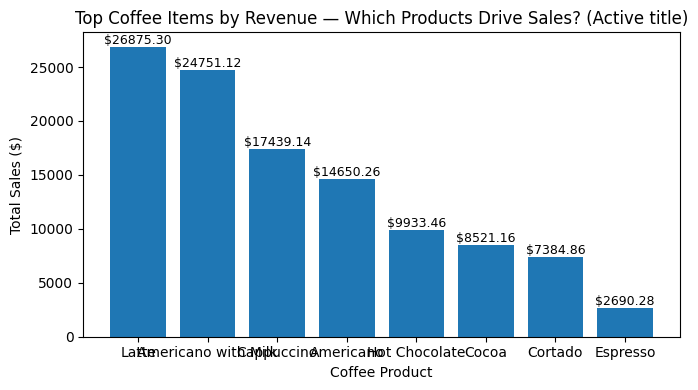

<Axes: xlabel='Time_of_Day', ylabel='coffee_name'>

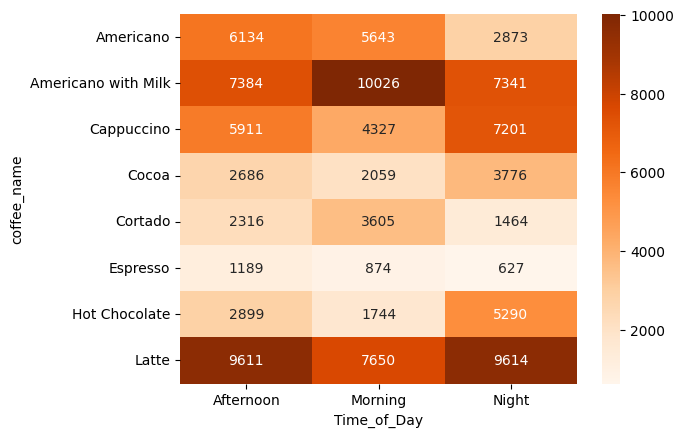

In [34]:
"""
1. First graph gives us the total sales by coffee product
2. Secodn graph gives us the sales broken down by day for the 3 slots
TODO:
1. Make this an active title
2. on the x axis define what meaning morning after noon eveing
3. move the y axis label to the top and have padding between the title and the label
4. remove the top and right box line for more space
5. Maybe we can facet these two graphs
"""

plt.figure(figsize=(7, 4))
plt.bar(sales_by_coffee["coffee_name"], sales_by_coffee["money"])
plt.xlabel("Coffee Product")
plt.ylabel("Total Sales ($)")
plt.title("Top Coffee Items by Revenue — Which Products Drive Sales? (Active title)")
for idx, val in enumerate(sales_by_coffee["money"]):
    plt.text(idx, val + 0.5, f"${val:.2f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

coffee_heatmap = df.pivot_table(
    index="coffee_name", columns="Time_of_Day", values="money", aggfunc="sum"
)
sns.heatmap(coffee_heatmap, cmap="Oranges", annot=True, fmt=".0f")

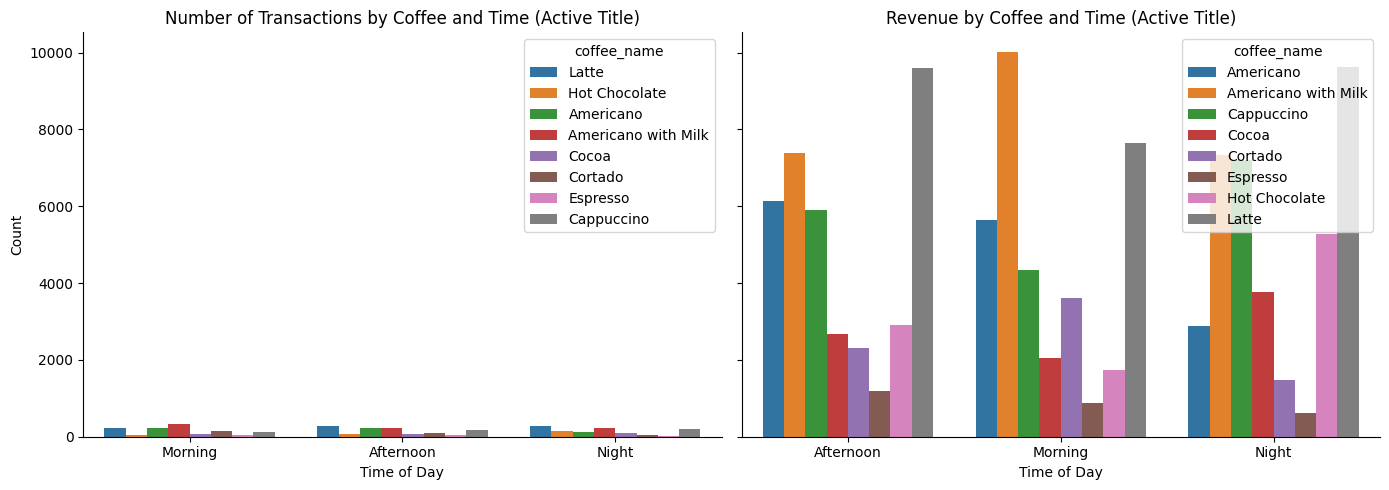

In [ ]:
"""
TODO:
1. Make this an active title
2. move the y axis label to the top and have padding between the title and the label
3. remove legends
4. the two graphs have issues since they are sharing the same y axis and plot 1 is lower in magnitude than plot 2
"""

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Left: transaction count
sns.countplot(data=df, x="Time_of_Day", hue="coffee_name", ax=axes[0])
axes[0].set_title("Number of Transactions by Coffee and Time (Active Title)")
axes[0].set_xlabel("Time of Day")
axes[0].set_ylabel("Count")
sns.despine(ax=axes[0])

# Right: total revenue
sns.barplot(
    data=coffee_time_sales, x="Time_of_Day", y="money", hue="coffee_name", ax=axes[1]
)
axes[1].set_title("Revenue by Coffee and Time (Active Title)")
axes[1].set_xlabel("Time of Day")
axes[1].set_ylabel("Total Sales ($)")
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()